In [ ]:
#!wget https://www.dropbox.com/s/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv?dl=0 -O example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv

--2023-10-05 01:25:01--  https://www.dropbox.com/s/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv [following]
--2023-10-05 01:25:01--  https://www.dropbox.com/s/raw/wy99ezotv49el49/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd121c70dfed121ca4fe27dfc53.dl.dropboxusercontent.com/cd/0/inline/CE8LZ_zOSmlDasbCcIWfcRbRxafYon5n9nHmbKvJPdMqZafo3CmojQlFwo0oqfyAN_wDdjOIIe80hz-gEtGcBpg9V6PyohGds39MB7Ciaj4Ff3g1eijTOt9cjfOOEg_9o1Q/file# [following]
--2023-10-05 01:25:02--  https://ucd121c70dfed1

In [ ]:
# Importando librerías y datos
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_csv('/content/example_callisto_gamma_4100m_1TeV_100TeV_55Tel_Area_250x250_fov8g.csv',sep=" ",usecols=['fPhot','fArrivalTime'])#,dtype={'fId':str}

In [ ]:
df.isna().sum().sort_values(ascending=False)

fPhot           0
fArrivalTime    0
dtype: int64

In [ ]:
print(len(df))

9965440


In [ ]:
df

,fPhot,fArrivalTime
0,-0.861328,164.990
1,-1.753910,131.935
2,-1.531250,136.663
3,-2.250000,162.914
4,1.445310,134.650
...,...,...
9965435,-2.367190,141.203
9965436,0.890625,133.252
9965437,0.000000,-1.000
9965438,0.000000,-1.000


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap="Greens")

,fPhot,fArrivalTime
fPhot,1.000000,0.027845
fArrivalTime,0.027845,1.000000


In [ ]:
X = pd.DataFrame()
X.loc[:,0] = df.loc[:,"fArrivalTime"]
X.loc[:,1] = df.loc[:,"fPhot"]

cls = KMeans(init="k-means++", n_clusters=7, n_init = 10)
cls.fit(X)

X["predicted_label"] = cls.labels_.astype(int)
X.columns = ["fArrivalTime","fPhot","label"]
X

,fArrivalTime,fPhot,label
0,164.990,-0.861328,2
1,131.935,-1.753910,5
2,136.663,-1.531250,1
3,162.914,-2.250000,2
4,134.650,1.445310,5
...,...,...,...
9965435,141.203,-2.367190,1
9965436,133.252,0.890625,5
9965437,-1.000,0.000000,0
9965438,-1.000,0.000000,0


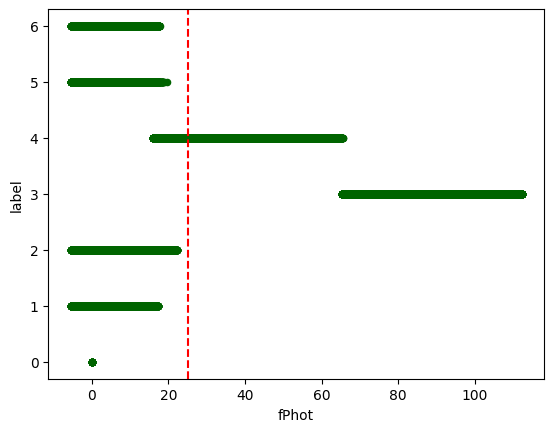

In [ ]:
import matplotlib.pyplot as plt
X.plot.scatter(x='fPhot', y='label', c='DarkGreen')
plt.axvline(x=25, color='r', linestyle='--')
plt.show()

In [ ]:
X.label.unique()

array([2, 5, 1, 6, 4, 3, 0])

In [ ]:
X.label.value_counts()

1    2412925
6    2311084
2    2294365
5    2240711
0     467130
4     170325
3      68900
Name: label, dtype: int64

In [ ]:
# Filtrar filas con fPhot <= 25
ruido = X[X['fPhot'] <= 25]
labels_ruido = ruido['label'].unique()

# Filtrar filas con fPhot > 25
señal = X[X['fPhot'] > 25]
labels_señal = señal['label'].unique()

print("Labels con fPhot <= 25:", labels_ruido)
print("Labels con fPhot > 25:", labels_señal)

Labels con fPhot <= 25: [2 5 1 6 4 0]
Labels con fPhot > 25: [3 4]


In [ ]:
label_repetido = [valor for valor in labels_ruido if valor in labels_señal]
label_repetido

[4]

In [ ]:
# Obtener la cantidad de valores con fPhot <= 25 y fPhot > 25 para label_repetido
label_repetido_ruido = len(X[(X['label'].isin(label_repetido)) & (X['fPhot'] <= 25)])
label_repetido_señal = len(X[(X['label'].isin(label_repetido)) & (X['fPhot'] > 25)])

print("Longitud del ruido en el label repetido{}: {}".format(label_repetido,label_repetido_ruido))
print("Longitud de la señal en el label repetido{}: {}\n".format(label_repetido,label_repetido_señal))

# Actualizar las variables labels_ruido y labels_señal
if label_repetido_ruido > label_repetido_señal:
    labels_señal = labels_señal[labels_señal != label_repetido[0]]  # Remover label_repetido de labels_señal
else:
    labels_ruido = labels_ruido[labels_ruido != label_repetido[0]]  # Remover label_repetido de labels_ruido

print("Labels con fPhot <= 25 (ruido):", labels_ruido)
print("Labels con fPhot > 25 (señal):", labels_señal)

Longitud del ruido en el label repetido[4]: 66205
Longitud de la señal en el label repetido[4]: 104120

Labels con fPhot <= 25 (ruido): [2 5 1 6 0]
Labels con fPhot > 25 (señal): [3 4]


In [ ]:
abs(label_repetido_señal - label_repetido_ruido)

37915

In [ ]:
ruido = ruido[(ruido['label'].isin(labels_ruido))]
ruido

,fArrivalTime,fPhot,label
0,164.990,-0.861328,2
1,131.935,-1.753910,5
2,136.663,-1.531250,1
3,162.914,-2.250000,2
4,134.650,1.445310,5
...,...,...,...
9965435,141.203,-2.367190,1
9965436,133.252,0.890625,5
9965437,-1.000,0.000000,0
9965438,-1.000,0.000000,0


In [ ]:
len(ruido)

9726215

In [ ]:
ruido.fPhot.describe()

count    9.726215e+06
mean     2.258861e-01
std      2.369383e+00
min     -5.531250e+00
25%     -1.281250e+00
50%      0.000000e+00
75%      1.195310e+00
max      2.231250e+01
Name: fPhot, dtype: float64

In [ ]:
señal = señal[(señal['label'].isin(labels_señal))]
señal

,fArrivalTime,fPhot,label
25,141.644,111.2500,3
26,142.183,108.5000,3
45,145.451,42.1250,4
46,151.101,25.4375,4
235,140.018,26.3750,4
...,...,...,...
9965163,144.914,109.0000,3
9965164,142.018,110.5000,3
9965165,155.013,48.7500,4
9965314,140.958,63.7500,4


In [ ]:
señal.fPhot.describe()

count    173020.000000
mean         62.873157
std          31.420244
min          25.062500
25%          34.375000
50%          52.375000
75%          98.250000
max         112.250000
Name: fPhot, dtype: float64

In [ ]:
len(señal)

173020

In [ ]:
#Sin Kmeans

# Contar la cantidad de filas con valores <= 25 en la columna 'fPhot'
cantidad_ruido = len(X[X['fPhot'] <= 25])

# Contar la cantidad de filas con valores > 25 en la columna 'fPhot'
cantidad_no_ruido = len(X[X['fPhot'] > 25])

comprobacion_real = cantidad_ruido + cantidad_no_ruido

print(f"Cantidad de valores <= 25 en 'fPhot': {cantidad_ruido}")
print(f"Cantidad de valores > 25 en 'fPhot': {cantidad_no_ruido}")

#Comprobar
print("\nSuma de ruido y señal real (sin usar Kmeans): {}".format(comprobacion_real))

Cantidad de valores <= 25 en 'fPhot': 9792420
Cantidad de valores > 25 en 'fPhot': 173020

Suma de ruido y señal real (sin usar Kmeans): 9965440


In [ ]:
comprobacion_Kmean = len(ruido)+len(señal)
print("Suma de ruido y señal usando Kmeans: {}".format(comprobacion_Kmean))

Suma de ruido y señal usando Kmeans: 9899235


In [ ]:
average = ((comprobacion_Kmean * 100)/100) / comprobacion_real

print("Average: ",average)

Average:  0.9933565402029414


In [ ]:
ruido.fPhot

0         -0.861328
1         -1.753910
2         -1.531250
3         -2.250000
4          1.445310
             ...   
9965435   -2.367190
9965436    0.890625
9965437    0.000000
9965438    0.000000
9965439    0.000000
Name: fPhot, Length: 9726215, dtype: float64

In [ ]:
señal.fPhot

25         111.2500
26         108.5000
45          42.1250
46          25.4375
235         26.3750
             ...   
9965163    109.0000
9965164    110.5000
9965165     48.7500
9965314     63.7500
9965395     30.1250
Name: fPhot, Length: 173020, dtype: float64

In [ ]:
ruido.groupby('label').count()

,fArrivalTime,fPhot
label,,
0,467130,467130
1,2412925,2412925
2,2294365,2294365
5,2240711,2240711
6,2311084,2311084


In [ ]:
señal.groupby('label').count()

,fArrivalTime,fPhot
label,,
3,68900,68900
4,104120,104120


In [ ]:
ruido.describe()

,fArrivalTime,fPhot,label
count,9.726215e+06,9.726215e+06,9.726215e+06
mean,1.382182e+02,2.258861e-01,3.297451e+00
std,3.309373e+01,2.369383e+00,2.152219e+00
min,-1.000000e+00,-5.531250e+00,0.000000e+00
25%,1.341580e+02,-1.281250e+00,1.000000e+00
50%,1.444430e+02,0.000000e+00,2.000000e+00
75%,1.542970e+02,1.195310e+00,5.000000e+00
max,1.649990e+02,2.231250e+01,6.000000e+00


In [ ]:
señal.describe()

,fArrivalTime,fPhot,label
count,173020.000000,173020.000000,173020.000000
mean,143.835931,62.873157,3.601780
std,4.764817,31.420244,0.489533
min,132.811000,25.062500,3.000000
25%,141.406000,34.375000,3.000000
50%,142.344000,52.375000,4.000000
75%,144.229000,98.250000,4.000000
max,164.999000,112.250000,4.000000


In [ ]:
grafica_ruido = ruido.copy()
grafica_ruido['label'] = 0
grafica_ruido

,fArrivalTime,fPhot,label
0,164.990,-0.861328,0
1,131.935,-1.753910,0
2,136.663,-1.531250,0
3,162.914,-2.250000,0
4,134.650,1.445310,0
...,...,...,...
9965435,141.203,-2.367190,0
9965436,133.252,0.890625,0
9965437,-1.000,0.000000,0
9965438,-1.000,0.000000,0


In [ ]:
grafica_ruido = ruido.copy()
grafica_ruido['label'] = 0
grafica_señal = señal.copy()
grafica_señal['label'] = 1

In [ ]:
grafica_señal = señal.copy()
grafica_señal['label'] = 1
grafica_señal

,fArrivalTime,fPhot,label
25,141.644,111.2500,1
26,142.183,108.5000,1
45,145.451,42.1250,1
46,151.101,25.4375,1
235,140.018,26.3750,1
...,...,...,...
9965163,144.914,109.0000,1
9965164,142.018,110.5000,1
9965165,155.013,48.7500,1
9965314,140.958,63.7500,1


In [ ]:
grafica_ruido.fPhot.describe()

count    9.726215e+06
mean     2.258861e-01
std      2.369383e+00
min     -5.531250e+00
25%     -1.281250e+00
50%      0.000000e+00
75%      1.195310e+00
max      2.231250e+01
Name: fPhot, dtype: float64

In [ ]:
grafica_señal.fPhot.describe()

count    173020.000000
mean         62.873157
std          31.420244
min          25.062500
25%          34.375000
50%          52.375000
75%          98.250000
max         112.250000
Name: fPhot, dtype: float64

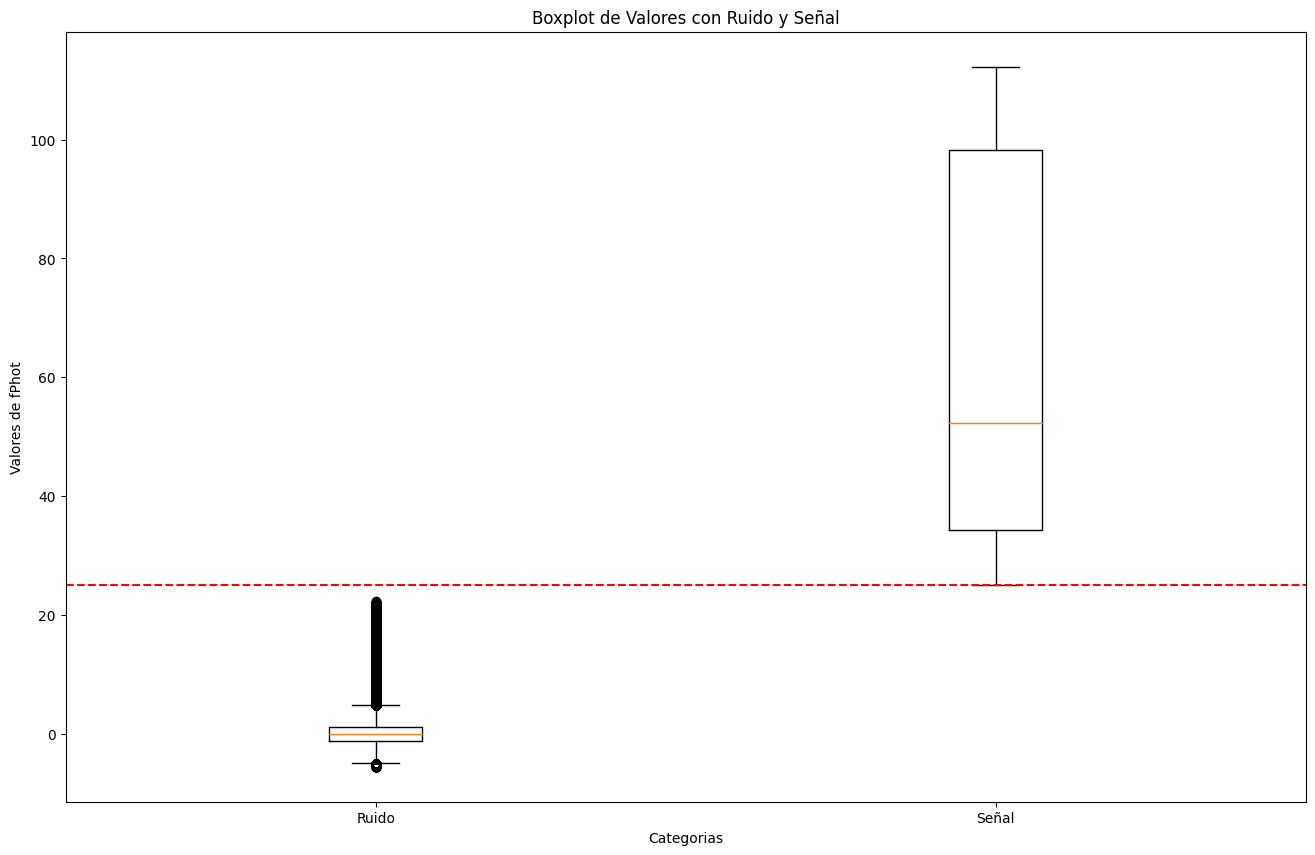

In [ ]:
data_0 = grafica_ruido['fPhot'].tolist()
data_1 = grafica_señal['fPhot'].tolist()

# Crear una lista que contenga las etiquetas para los boxplots
etiquetas = ['Ruido', 'Señal']

# Crear una figura
plt.figure(figsize=(16, 10))

# Crear el boxplot
plt.boxplot([data_0, data_1], labels=etiquetas)

# Configurar el título y etiquetas de los ejes
plt.title('Boxplot de Valores con Ruido y Señal')
plt.axhline(y=25, color='r', linestyle='--')
plt.xlabel('Categorias')
plt.ylabel('Valores de fPhot')

# Mostrar el gráfico
plt.show()